Kevin Andrés Restrepo Tobón     CC 1000639128

# Examen 3
<a href="https://colab.research.google.com/github/restrepo/ComputationalMethods/blob/master/exams/Examen_2020_2_03_enunciado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Kevin Andrés Restrepo Tobón         CC 1000639128

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import optimize 
import pandas as pd

##1) 
Determine el espacio de configuraciones, en los ejes $(\omega, x)$, del movimiento horizontal sin fricción de una masa de $0.2\ \text{Kg}$ atada a un resorte de constante elástica $k=1\ \text{N/m}$.


$$
m\frac{d^{2}x}{dt^2} = -kx
$$
$$
\omega = \sqrt{\frac{k}{m}}
$$
$$
\frac{d^{2}x}{dt^2} = -\omega^2 x = \frac{dv}{dt}
$$

$$
U = \begin{pmatrix}
x\\
v
\end{pmatrix}
$$

$$
\frac{d}{dt}U = \begin{pmatrix}
v\\
-\omega^2 x
\end{pmatrix}
$$

In [73]:
def dU_dt(U, t, k = 1, m = 0.2):
    x,v = U
    ω = np.sqrt(k/m)
    return [v,
            -ω**2*x] 
U0 = [0.1,0]
t = np.linspace(0,10,1000)
Us = integrate.odeint(dU_dt,U0,t)




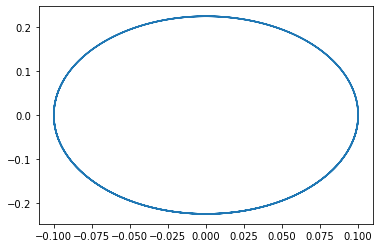

In [74]:
plt.plot(Us[:,0],Us[:,1])

[-0.29753110182052356, 1.9077332159399862]


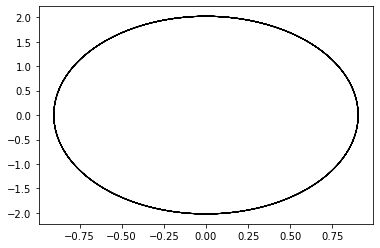

In [80]:
N = 100 #número de configuraciones
x0s = np.random.uniform(-1,1,N) #x inicial entre -1 y 1 metros
v0s = np.random.uniform(-5,5,N) #velocidades iniciales entre -5 y 5 m/s
U0 = [x0s[0],v0s[0]]
print(U0)
t = np.linspace(0,20,1000)
Us = integrate.odeint(dU_dt,U0,t)
plt.plot(Us[:,0],Us[:,1],lw = 1, color = "black" )
plt.show()

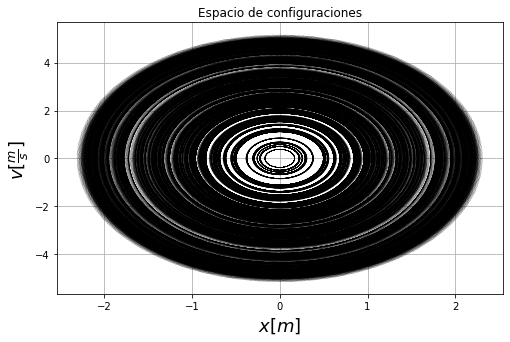

In [84]:
j=0
plt.figure( figsize = (8,5) )
for x0, v0 in zip(x0s, v0s):
    t=np.linspace(0,100,400)
    U0=[x0,v0]
    Us=integrate.odeint(dU_dt,U0,t)
    plt.plot(Us[:,0],Us[:,1],lw = 0.1, color = "K" )
    if j==N: #secutity stop
        break
    j=j+1
    
plt.xlabel( "$x[m]$", fontsize = 18 )
plt.ylabel( r"$v[\frac{m}{s}]$ ", fontsize = 18 )
plt.title( "Espacio de configuraciones" )
plt.grid(1) 


##2) 
Considere una muestra de Strontium-90, ${}^{98}_{38}\text{Sr}$, que contieme inicialmente 1000 núcleos de Strontium-90 sin decaer. En la base de datos: 

[https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json](https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json) 

se tienen los datos de decaimiento durante 200 años. Despues de 10 años quedan 809 nucleos sin decaer, después de 22 años quedan 564 y así sucesivamente. 

El decaimiento radiativo está determinado por la formula
$$
N(t)=N_0 \operatorname{e}^{-\lambda t}\,,\qquad \lambda=\frac{\ln(2)}{\tau}
$$
* $N(t)$ es el número de núcleos radioactivos que qedan despues de un tiempo $t$
* $N_0$ es el número inicial de las partículas presentes (es decir, $t=0$)
* $\lambda$ es la constante de decaimiento
* $\tau$ es la vida medía, es decir, el tiempo durante el cual la mitad de la muestra radioactiva ha decaído.

(a) Realice un fit a los datos y determine la vida media con su respectivo error.

(b) Grafique los datos como puntos en el plano $t$, $N(t)$ y el correspondiente al fit

In [92]:
url = 'https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json'

df = pd.read_json(url)
df

,t,N(t)
0,0,1000
1,10,809
2,22,564
3,33,480
4,40,370
5,50,285
6,60,199
7,70,169
8,80,131
9,99,101


$$
N(t) = Ae^{c t} + d
$$

In [144]:
def func(t, A,c, d):
    return A*np.exp(c*t) + d
p0 = [1000, -3e-3, 0]                                        # guessed params
w,dw = optimize.curve_fit(func,df.t,df['N(t)'],p0 = p0)   
sigma = np.sqrt(np.diag(dw))  
print("Estimated Parameters:\n A = {:.2f} ± {:.2f}\n c = {:.2f} ± {:.2f}\n d = {:.2f} ± {:.2f}".format(w[0],sigma[0],w[1],sigma[1],w[2],sigma[2]))  

# Model
t_lin=np.linspace(0,200)
y_model = func(t_lin, *w)

Estimated Parameters:
 A = 1012.95 ± 12.31
 c = -0.03 ± 0.00
 d = 0.00 ± 6.13


$$
\lambda = |c| = \frac{ln(2)}{\tau}
$$
$$
\tau = \frac{ln(2)}{c}
$$

In [145]:
#Vida media
τ = np.log(2)/np.abs(w[1])
#error
dτ = np.log(2)*sigma[1]/(np.abs(w[1]))**2

print('vida media :\n {:.2f} ± {:.2f} años'.format(τ,dτ))


vida media :
 27.64 ± 0.76 años


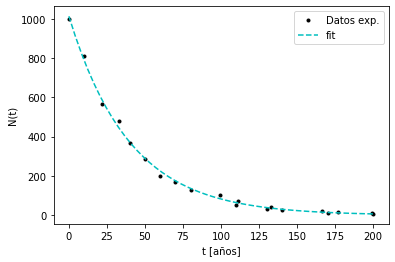

In [146]:
plt.plot(df.t,df['N(t)'],'k.', label = 'Datos exp.')
plt.plot(t_lin,y_model,'c--', label = 'fit')
plt.legend()
plt.xlabel('t [años]')
plt.ylabel('N(t)')
plt.show()